<a href="https://colab.research.google.com/github/Joagai23/SistemasInteligentesPokerBot/blob/master/PokerFuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install scikit-fuzzy

# Fuzzy Logic

In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [0]:
#Fuzzy1
#Antecedentes: ronda, porcentage, dinero
#Consecuencia:accion
#acciones->abandonar, seguir, apostar
rounds = ctrl.Antecedent(np.arange(0, 4, 1), 'Round')
percentage = ctrl.Antecedent(np.arange(0, 1.01, 0.1), 'Percentage') 
money = ctrl.Antecedent(np.arange(0, 101, 1), 'Money')

act = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'Action')

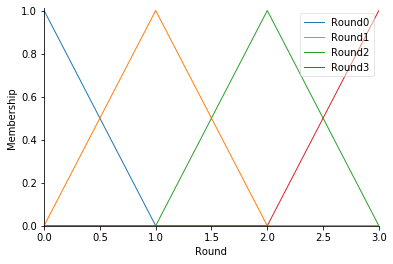

In [41]:
rounds['Round0'] = fuzz.trimf(rounds.universe, [0, 0, 1])
rounds['Round1'] = fuzz.trimf(rounds.universe, [1, 1, 2])
rounds['Round2'] = fuzz.trimf(rounds.universe, [2, 2, 3])
rounds['Round3'] = fuzz.trimf(rounds.universe, [3, 3, 4])
rounds.view()

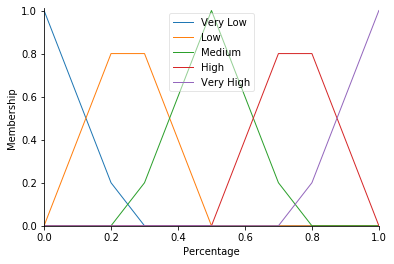

In [42]:
percentage['Very Low'] = fuzz.trimf(percentage.universe, [0, 0, 0.25])
percentage['Low'] = fuzz.trimf(percentage.universe, [0, 0.25, 0.5])
percentage['Medium'] = fuzz.trimf(percentage.universe, [0.25, 0.5, 0.75])
percentage['High'] = fuzz.trimf(percentage.universe, [0.5, 0.75, 1])
percentage['Very High'] = fuzz.trimf(percentage.universe, [0.75, 1, 1])
percentage.view()

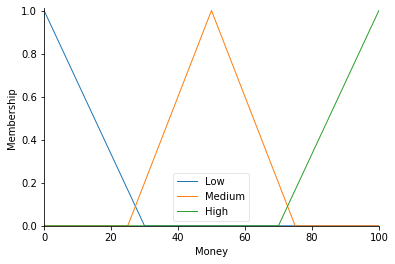

In [43]:
money['Low'] = fuzz.trimf(money.universe, [0, 0, 30])
money['Medium'] = fuzz.trimf(money.universe, [25, 50, 75])
money['High'] = fuzz.trimf(money.universe, [70, 100, 100])
money.view()

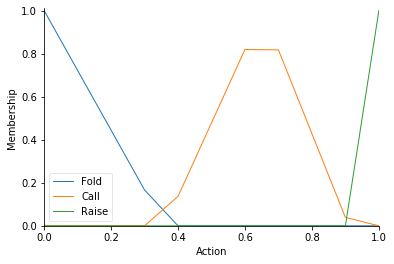

In [44]:
act['Fold'] = fuzz.trimf(act.universe, [0, 0, 0.36])
act['Call'] = fuzz.trimf(act.universe, [0.36, 0.653, 0.91])
act['Raise'] = fuzz.trimf(act.universe, [0.91, 1, 1])
act.view()

In [0]:
#RULES para ver si abandonar, seguir o apostar
rule1  = ctrl.Rule(percentage['Very Low'],                                                                                                         act['Fold'])
rule2  = ctrl.Rule(percentage['Very High'],                                                                                                        act['Raise'])
rule3  = ctrl.Rule(rounds['Round0']    &   (percentage['High']   | percentage['Medium'] | percentage['Low']),                                      act['Call'])
rule4  = ctrl.Rule(rounds['Round1']    &    percentage['Low']                                                  &  money['Low'],                    act['Fold'])
rule5  = ctrl.Rule(rounds['Round1']    &    percentage['Low']                                                  & (money['Medium'] | money['Low']), act['Call'])
rule6  = ctrl.Rule(rounds['Round1']    &   (percentage['Medium'] | percentage['High']),                                                            act['Call'])
rule7  = ctrl.Rule(rounds['Round2']    &   (percentage['Low']    | percentage['Medium'])                       & (money['Medium'] | money['Low']), act['Fold'])
rule8  = ctrl.Rule(rounds['Round2']    &   (percentage['Low']    | percentage['Medium'])                       &  money['High'],                   act['Call'])
rule9  = ctrl.Rule(rounds['Round2']    &    percentage['High'],                                                                                    act['Call'])
rule10 = ctrl.Rule(rounds['Round3']    &   (percentage['Low']    | percentage['Medium']),                                                          act['Fold'])
rule11 = ctrl.Rule(rounds['Round3']    &   percentage['High'],                                                                                     act['Call'])

In [0]:
action_ctrl = ctrl.ControlSystem([rule1,  rule2,  rule3,  rule4,  rule5,  rule6,  rule7,  rule8,  rule9, rule10, rule11])

In [0]:
action = ctrl.ControlSystemSimulation(action_ctrl)

In [0]:
def getAction(roundNum, percentageVal, moneyVal):
    
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    action.input['Round'] = roundNum
    action.input['Percentage'] = percentageVal
    action.input['Money'] = moneyVal


    # Crunch the numbers
    action.compute()

    string = ""

    if percentageVal < 0.36:
      string = "Fold"
    elif percentageVal >= 0.36 and percentageVal < 0.91:
      string = "Call"
    elif percentageVal >= 0.91 and percentageVal <= 1:
      string = "Raise"
    
    act.view(sim=action)
    print("Action:", string)
    
    rounds.view(sim=action)
    percentage.view(sim=action)
    money.view(sim=action)
    #return string

Action: Call


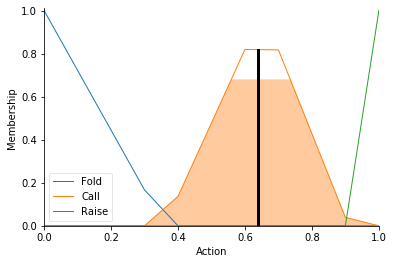

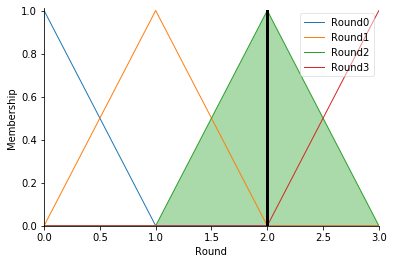

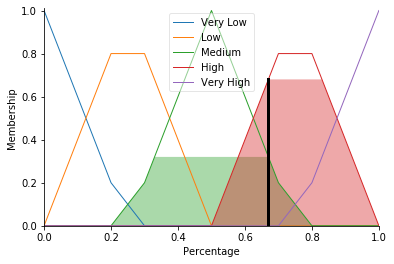

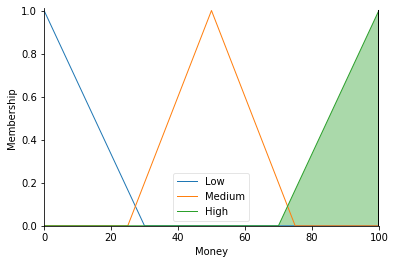

In [63]:
getAction(2, 0.67, 100)

In [0]:
#Fuzzy2
#Antecedentes: ronda, porcentage, dinero
#Consecuencia:cantidad de tu dinero que debes apostar
#correlacion con la anterior, se ejecuta siempre
rounds2 = ctrl.Antecedent(np.arange(0, 4, 1), 'Round')
percentage2 = ctrl.Antecedent(np.arange(0, 1.01, 0.1), 'Percentage') 
money2 = ctrl.Antecedent(np.arange(0, 101, 1), 'Money')

moneyPerc = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'Percentageofyourmoney')

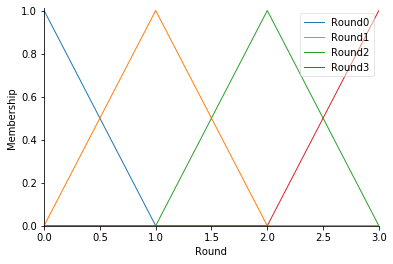

In [51]:
rounds2['Round0'] = fuzz.trimf(rounds2.universe, [0, 0, 1])
rounds2['Round1'] = fuzz.trimf(rounds2.universe, [1, 1, 2])
rounds2['Round2'] = fuzz.trimf(rounds2.universe, [2, 2, 3])
rounds2['Round3'] = fuzz.trimf(rounds2.universe, [3, 3, 4])
rounds2.view()

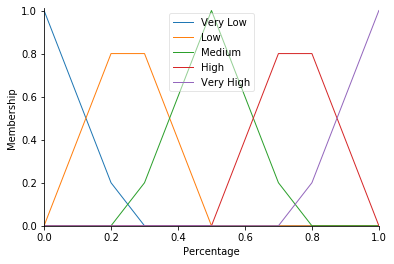

In [52]:
percentage2['Very Low'] = fuzz.trimf(percentage2.universe, [0, 0, 0.25])
percentage2['Low'] = fuzz.trimf(percentage2.universe, [0, 0.25, 0.5])
percentage2['Medium'] = fuzz.trimf(percentage2.universe, [0.25, 0.5, 0.75])
percentage2['High'] = fuzz.trimf(percentage2.universe, [0.5, 0.75, 1])
percentage2['Very High'] = fuzz.trimf(percentage2.universe, [0.75, 1, 1])
percentage2.view()

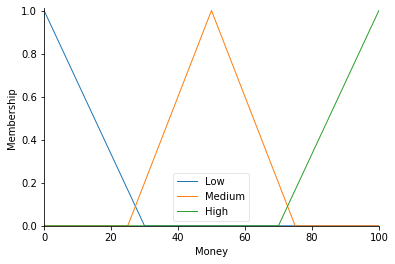

In [53]:
money2['Low'] = fuzz.trimf(money2.universe, [0, 0, 30])
money2['Medium'] = fuzz.trimf(money2.universe, [25, 50, 75])
money2['High'] = fuzz.trimf(money2.universe, [70, 100, 100])
money2.view()

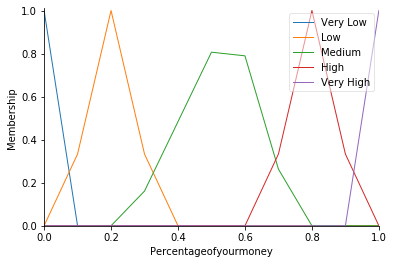

In [54]:
#porcentage de tu dinero que vas a apostar
moneyPerc['Very Low'] = fuzz.trimf(moneyPerc.universe, [0, 0, 0.1])
moneyPerc['Low'] = fuzz.trimf(moneyPerc.universe, [0.05, 0.2, 0.35])
moneyPerc['Medium'] = fuzz.trimf(moneyPerc.universe, [0.25, 0.56, 0.75])
moneyPerc['High'] = fuzz.trimf(moneyPerc.universe, [0.65, 0.8, 0.95])
moneyPerc['Very High'] = fuzz.trimf(moneyPerc.universe, [0.9, 1, 1])
moneyPerc.view()

In [0]:
rule21  = ctrl.Rule(percentage2['Very Low'],                                                                                                         moneyPerc['Very Low']) #FOLD
rule22  = ctrl.Rule(percentage2['Very High'],                                                                                                        moneyPerc['Very High']) #RAISE
rule23  = ctrl.Rule(rounds2['Round0']    &   (percentage2['Medium'] | percentage2['Low']),                                                              moneyPerc['Very Low']) #CALL
rule24  = ctrl.Rule(rounds2['Round0']    &   percentage2['High'],                                                                                        moneyPerc['Low']) #CALL
rule25  = ctrl.Rule(rounds2['Round1']    &    percentage2['Low']                                                  &  money2['Low'],                    moneyPerc['Very Low']) #FOLD
rule26  = ctrl.Rule(rounds2['Round1']    &    percentage2['Low']                                                  & (money2['Medium'] | money2['Low']), moneyPerc['Low']) #CALL
rule27  = ctrl.Rule(rounds2['Round1']    &   (percentage2['Medium'] | percentage2['High']),                                                            moneyPerc['Medium']) #CALL
rule28  = ctrl.Rule(rounds2['Round2']    &   (percentage2['Low']    | percentage2['Medium'])                       & (money2['Medium'] | money2['Low']), moneyPerc['Very Low']) #FOLD
rule29  = ctrl.Rule(rounds2['Round2']    &   (percentage2['Low']    | percentage2['Medium'])                       &  money2['High'],                   moneyPerc['Medium']) #CALL
rule30  = ctrl.Rule(rounds2['Round2']    &    percentage2['High'],                                                                                    moneyPerc['High']) #CALL OR RAISE
rule31 = ctrl.Rule(rounds2['Round3']    &   (percentage2['Low']    | percentage2['Medium']),                                                          moneyPerc['Very Low']) #FOLD
rule32 = ctrl.Rule(rounds2['Round3']    &   percentage2['High'],                                                                                     moneyPerc['High']) #CALL OR RAISE

In [0]:
action_ctrl2 = ctrl.ControlSystem([rule21,  rule22,  rule23,  rule24,  rule25,  rule26,  rule27,  rule28,  rule29, rule30, rule31, rule32])

In [0]:
action2 = ctrl.ControlSystemSimulation(action_ctrl2)

In [0]:
import math

def getMoneyPercentage(roundNum, percentageVal, moneyVal):

    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    action2.input['Round'] = roundNum
    action2.input['Percentage'] = percentageVal
    action2.input['Money'] = moneyVal

    # Crunch the numbers
    action2.compute()
    
    dollars = action2.output['Percentageofyourmoney']
    print("Percentage of Bet:", dollars)
    
    moneyPerc.view(sim=action2)
    
    rounds2.view(sim=action2)
    percentage2.view(sim=action2)
    money2.view(sim=action2)
    #return dollars

Percentage of Bet: 0.6553682075217281


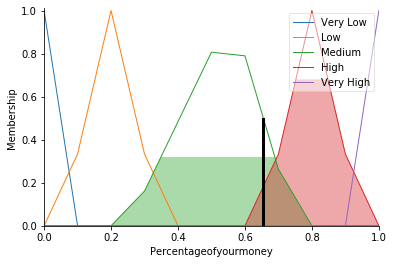

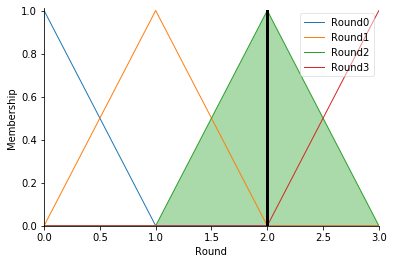

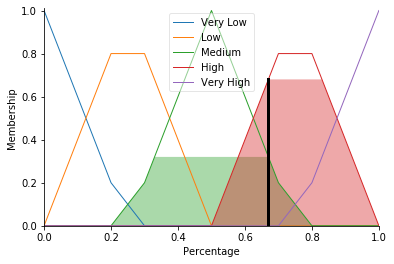

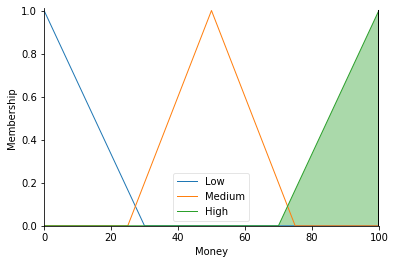

In [62]:
getMoneyPercentage(2, 0.67, 100)